In [1]:
cd((@__DIR__) * raw"\..")
include("../table_reader.jl")

extract_series (generic function with 1 method)

In [2]:
series=extract_series("TX_STAID000031.txt",plot=false)
years=unique(Dates.year.(series.DATE))

#Imputing missing values
# include("utils/Missing_values.jl")
# ImputeMissingValues!(series[!,2],series.DATE)
# N=length(series[!,2])

107-element Vector{Int64}:
 1897
 1898
 1899
 1900
 1901
 1902
 1903
 1904
 1905
 1906
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## I. Series filtered by removing a trigonometric periodicity

In [3]:
include("../utils/periodicity.jl")
trigo_function=fitted_periodicity_fonc(series[!,2],series.DATE,OrderTrig=3)
periodicity=trigo_function.(series.DATE)
x=series[!,2]-periodicity

38758-element Vector{Float64}:
  0.3031220105843886
  1.0227502764981207
  1.739537737936601
 -1.0464959409874925
  2.7646706494918156
  0.37306063220811225
  4.278698807622238
  3.8816116155644522
  3.481827094203334
  4.579374836292795
  ⋮
  2.629806840883335
  0.5351673212811061
 -0.9600070677382657
 -1.8557276814811026
  0.0479933976550484
  2.8511434320138918
  3.2537091024317135
  1.7556765837464745
  2.35703162189942

## Segmenting the dataset by month

In [4]:
include("../utils/Separation.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(x,series.DATE)

12-element Vector{Vector{AbstractVector}}:
 [[0.3031220105843886, 1.0227502764981207, 1.739537737936601, -1.0464959409874925, 2.7646706494918156, 0.37306063220811225, 4.278698807622238, 3.8816116155644522, 3.481827094203334, 4.579374836292795  …  -2.4454645891463294, -8.979292324212729, -11.515240622923148, -7.753263440258553, -1.1933141794425755, -0.7353457678946285, -6.579310733937447, -6.6251612841058805, -4.272849380901228, -5.822326820832968], [0.003122010584389656, 1.1227502764981203, 4.4395377379366, 2.853504059012508, 2.664670649491816, 0.9730606322081119, 1.1786988076222382, 1.5816116155644533, 1.181827094203335, 1.8793748362927936  …  2.5545354108536706, 4.620707675787273, 0.6847593770768512, 3.9467365597414474, 0.9066858205574242, 1.0646542321053705, 3.120689266062554, 0.9748387158941192, -1.0728493809012285, 4.177673179167032], [-1.4968779894156103, 3.9227502764981192, -2.1604622620633993, 0.5535040590125089, 4.464670649491815, 4.173060632208113, 2.8786988076222375, 3.08161

## Autocorrelations

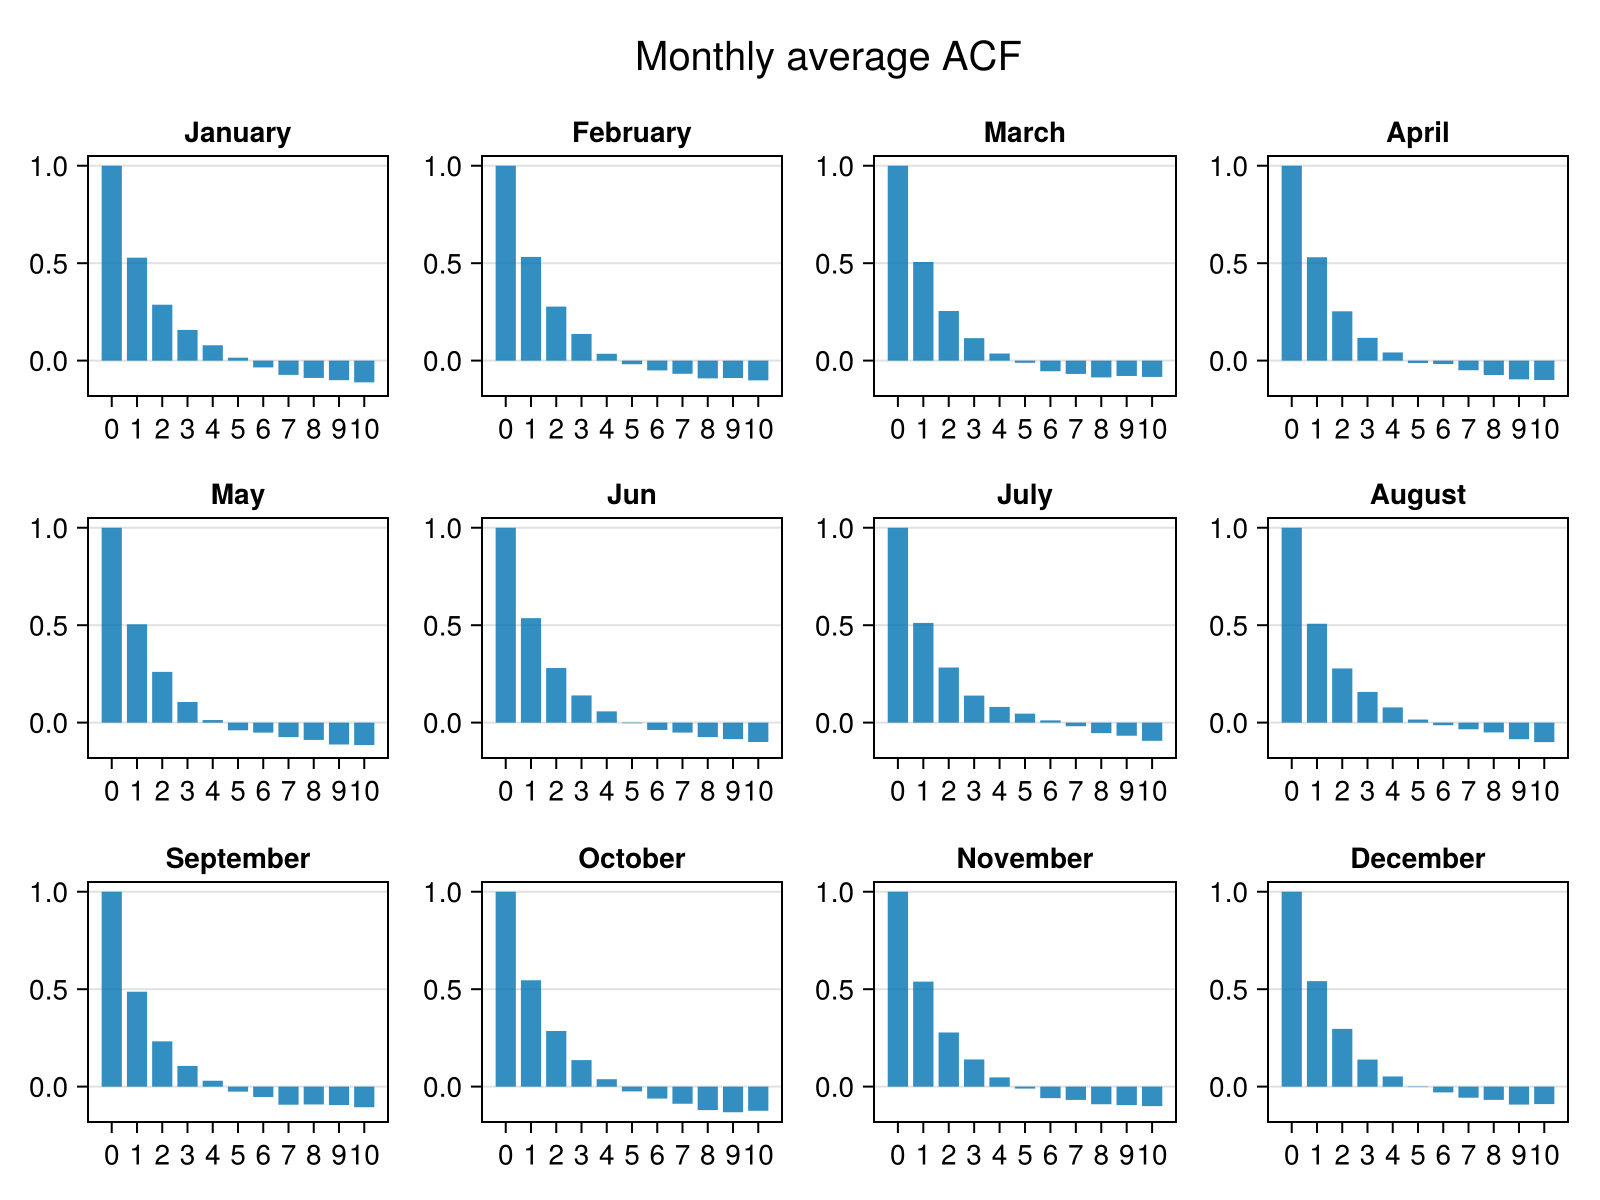

CairoMakie.Screen{IMAGE}


In [5]:
include("../utils/ACF_PACF.jl")
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

For each month, it still looks like an AR(1) model

# Estimation AR(1)

## Estimation

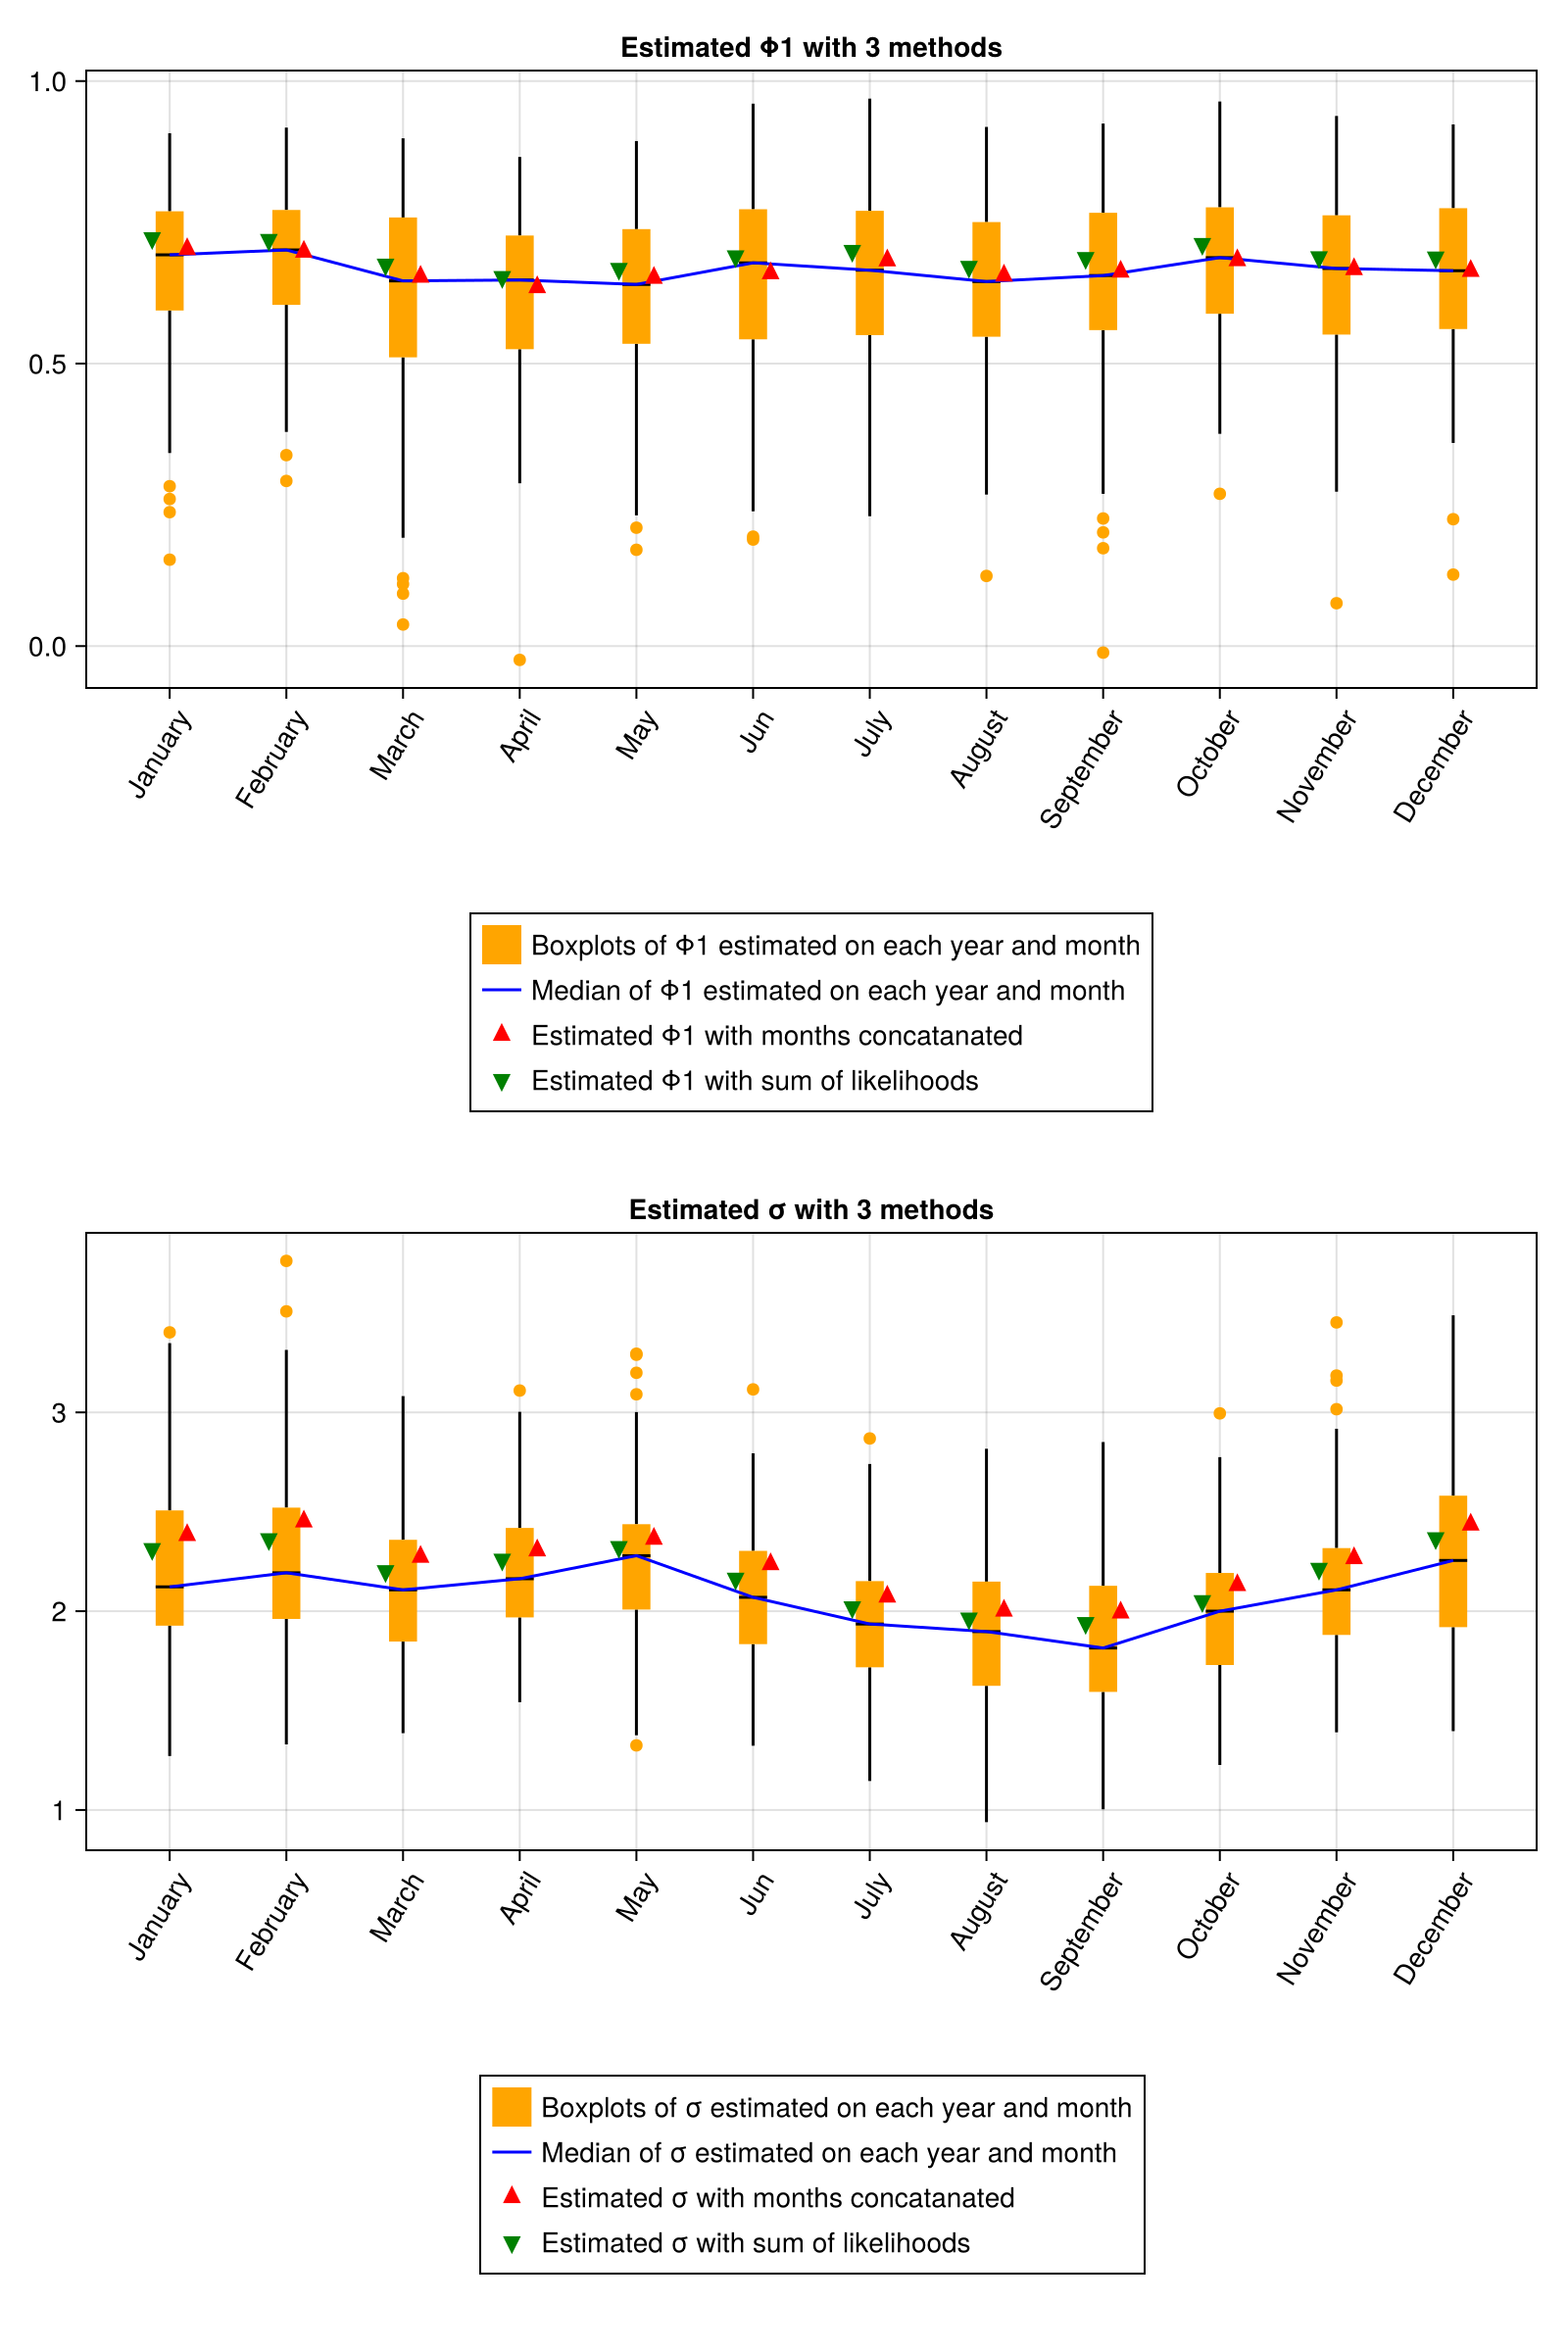

CairoMakie.Screen{IMAGE}


In [6]:
include(raw"..\utils\Estimation.jl")
Params, figure= AllEstimation(Monthly_temp, lineplot=true)
display(figure)

## Simulation

### With estimation on each month

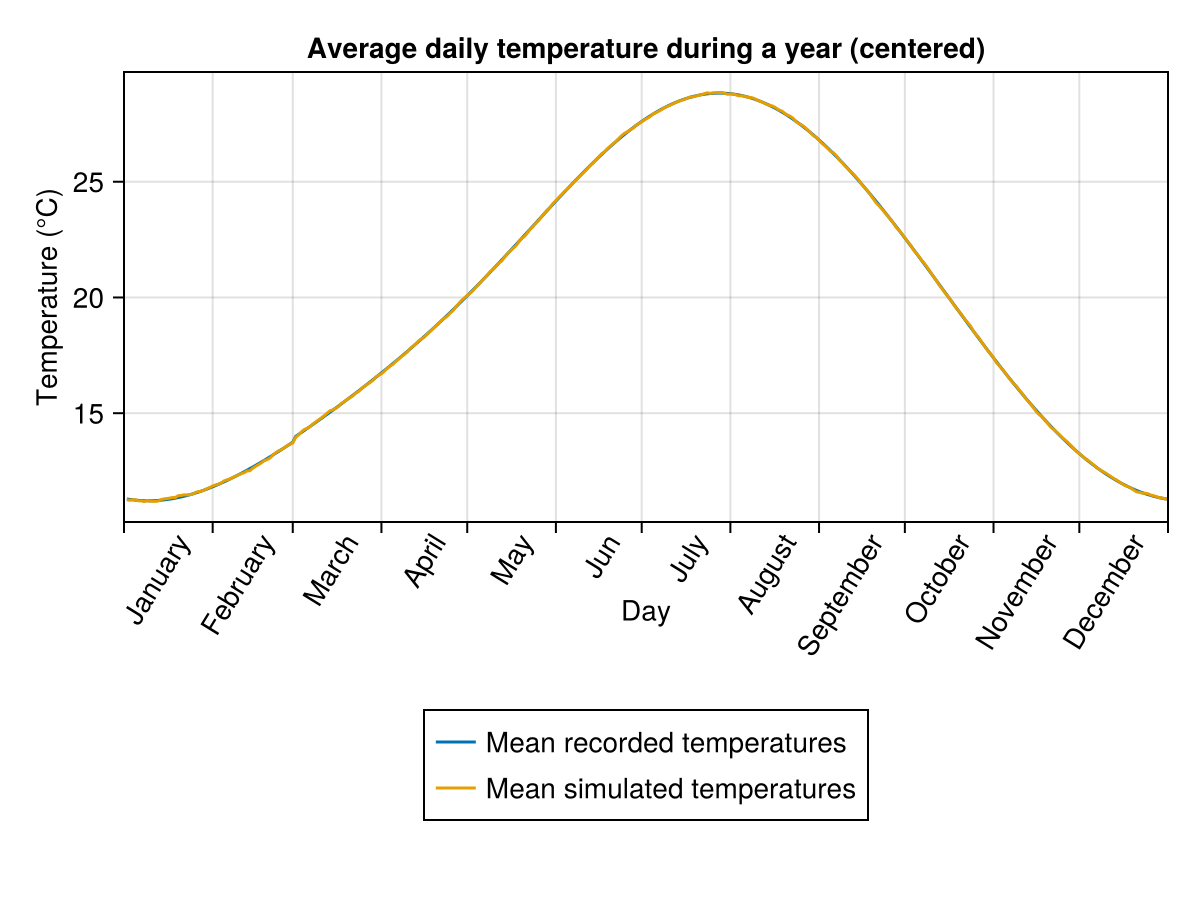

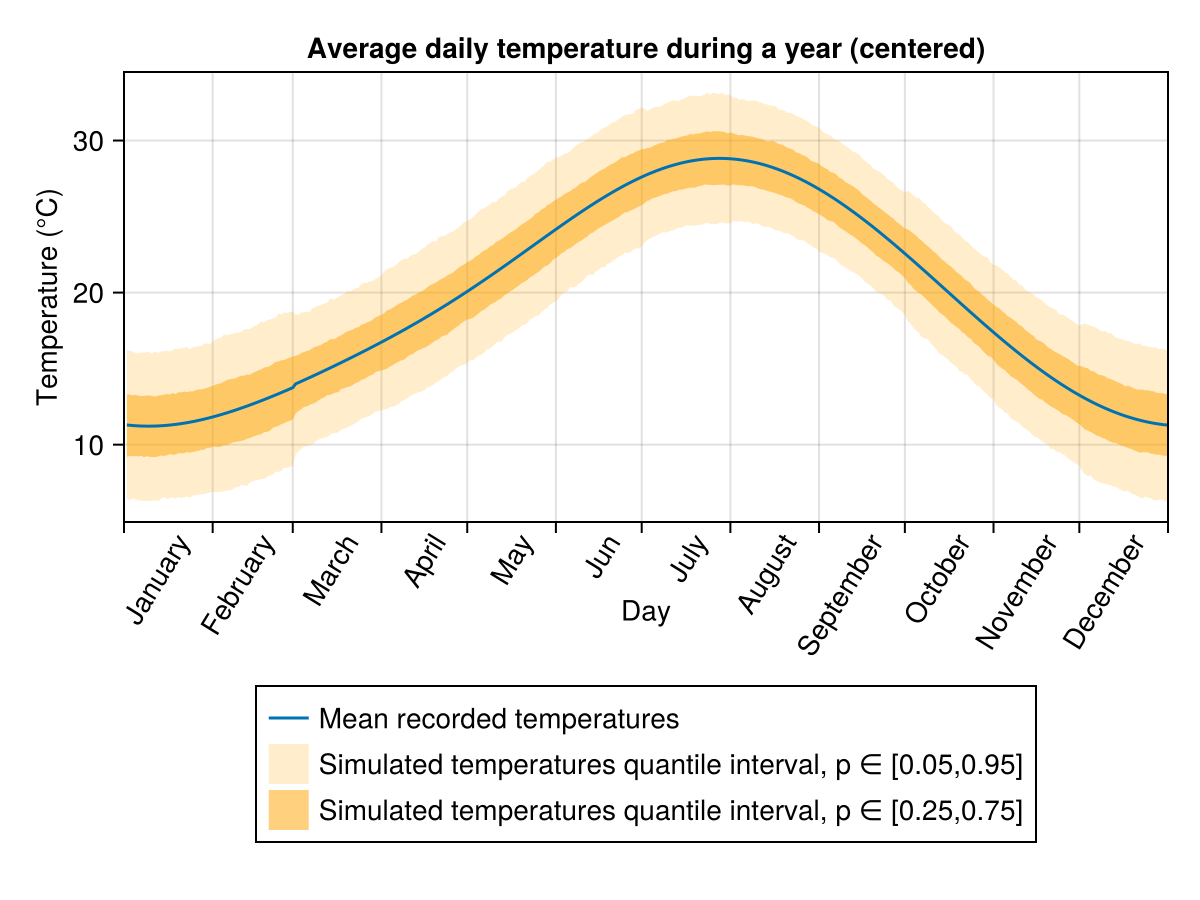

CairoMakie.Screen{IMAGE}


In [7]:
include("../utils/Simulation.jl")
include("../utils/Plotting.jl")
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"mean")
# Monthly_temp[1][1][1]::AbstractVector
# Φ_month_mean::AbstractVector
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

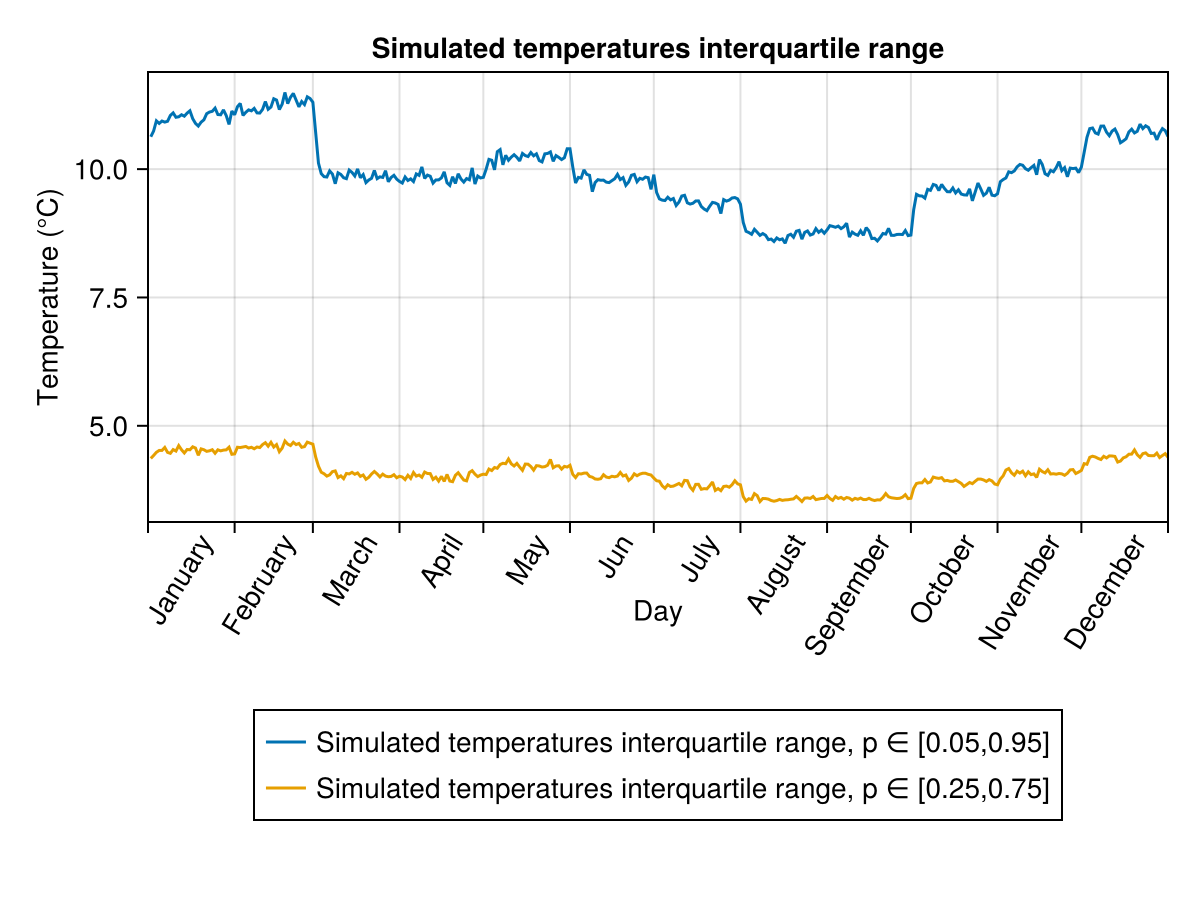

CairoMakie.Screen{IMAGE}


In [8]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"concat")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

### With sum of likelihoods

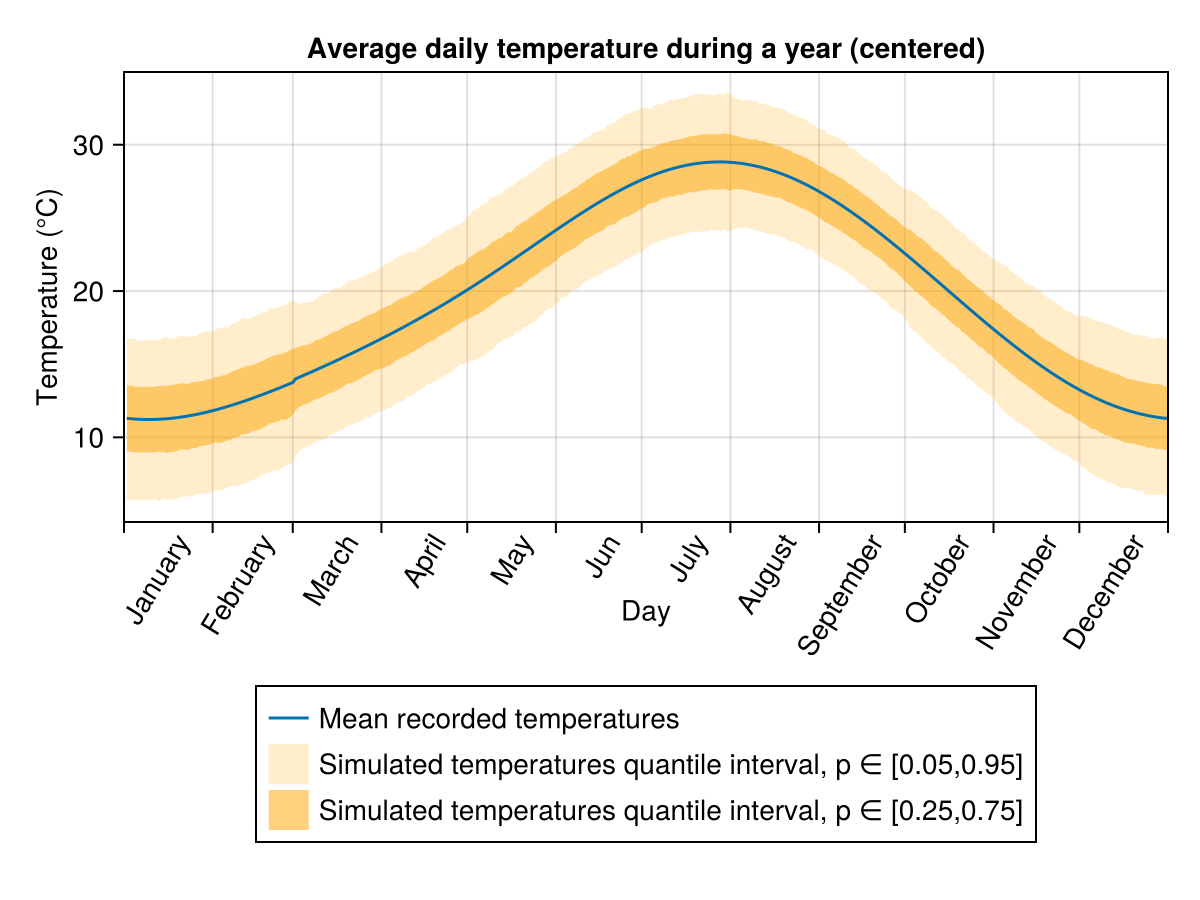

CairoMakie.Screen{IMAGE}


In [9]:
period=[periodicity[1:59] ; periodicity[61:366]]
Φ_month_mean,σ_month_mean=TakeParameters(Params,"sumLL")
sample_ = SimulateYears(Monthly_temp[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([period],length(sample_))) 
display(PlotYearCurves([period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)"))
display(PlotYearCurves(period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
))
display(PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
))

# Estimation AR(2)

## Estimation

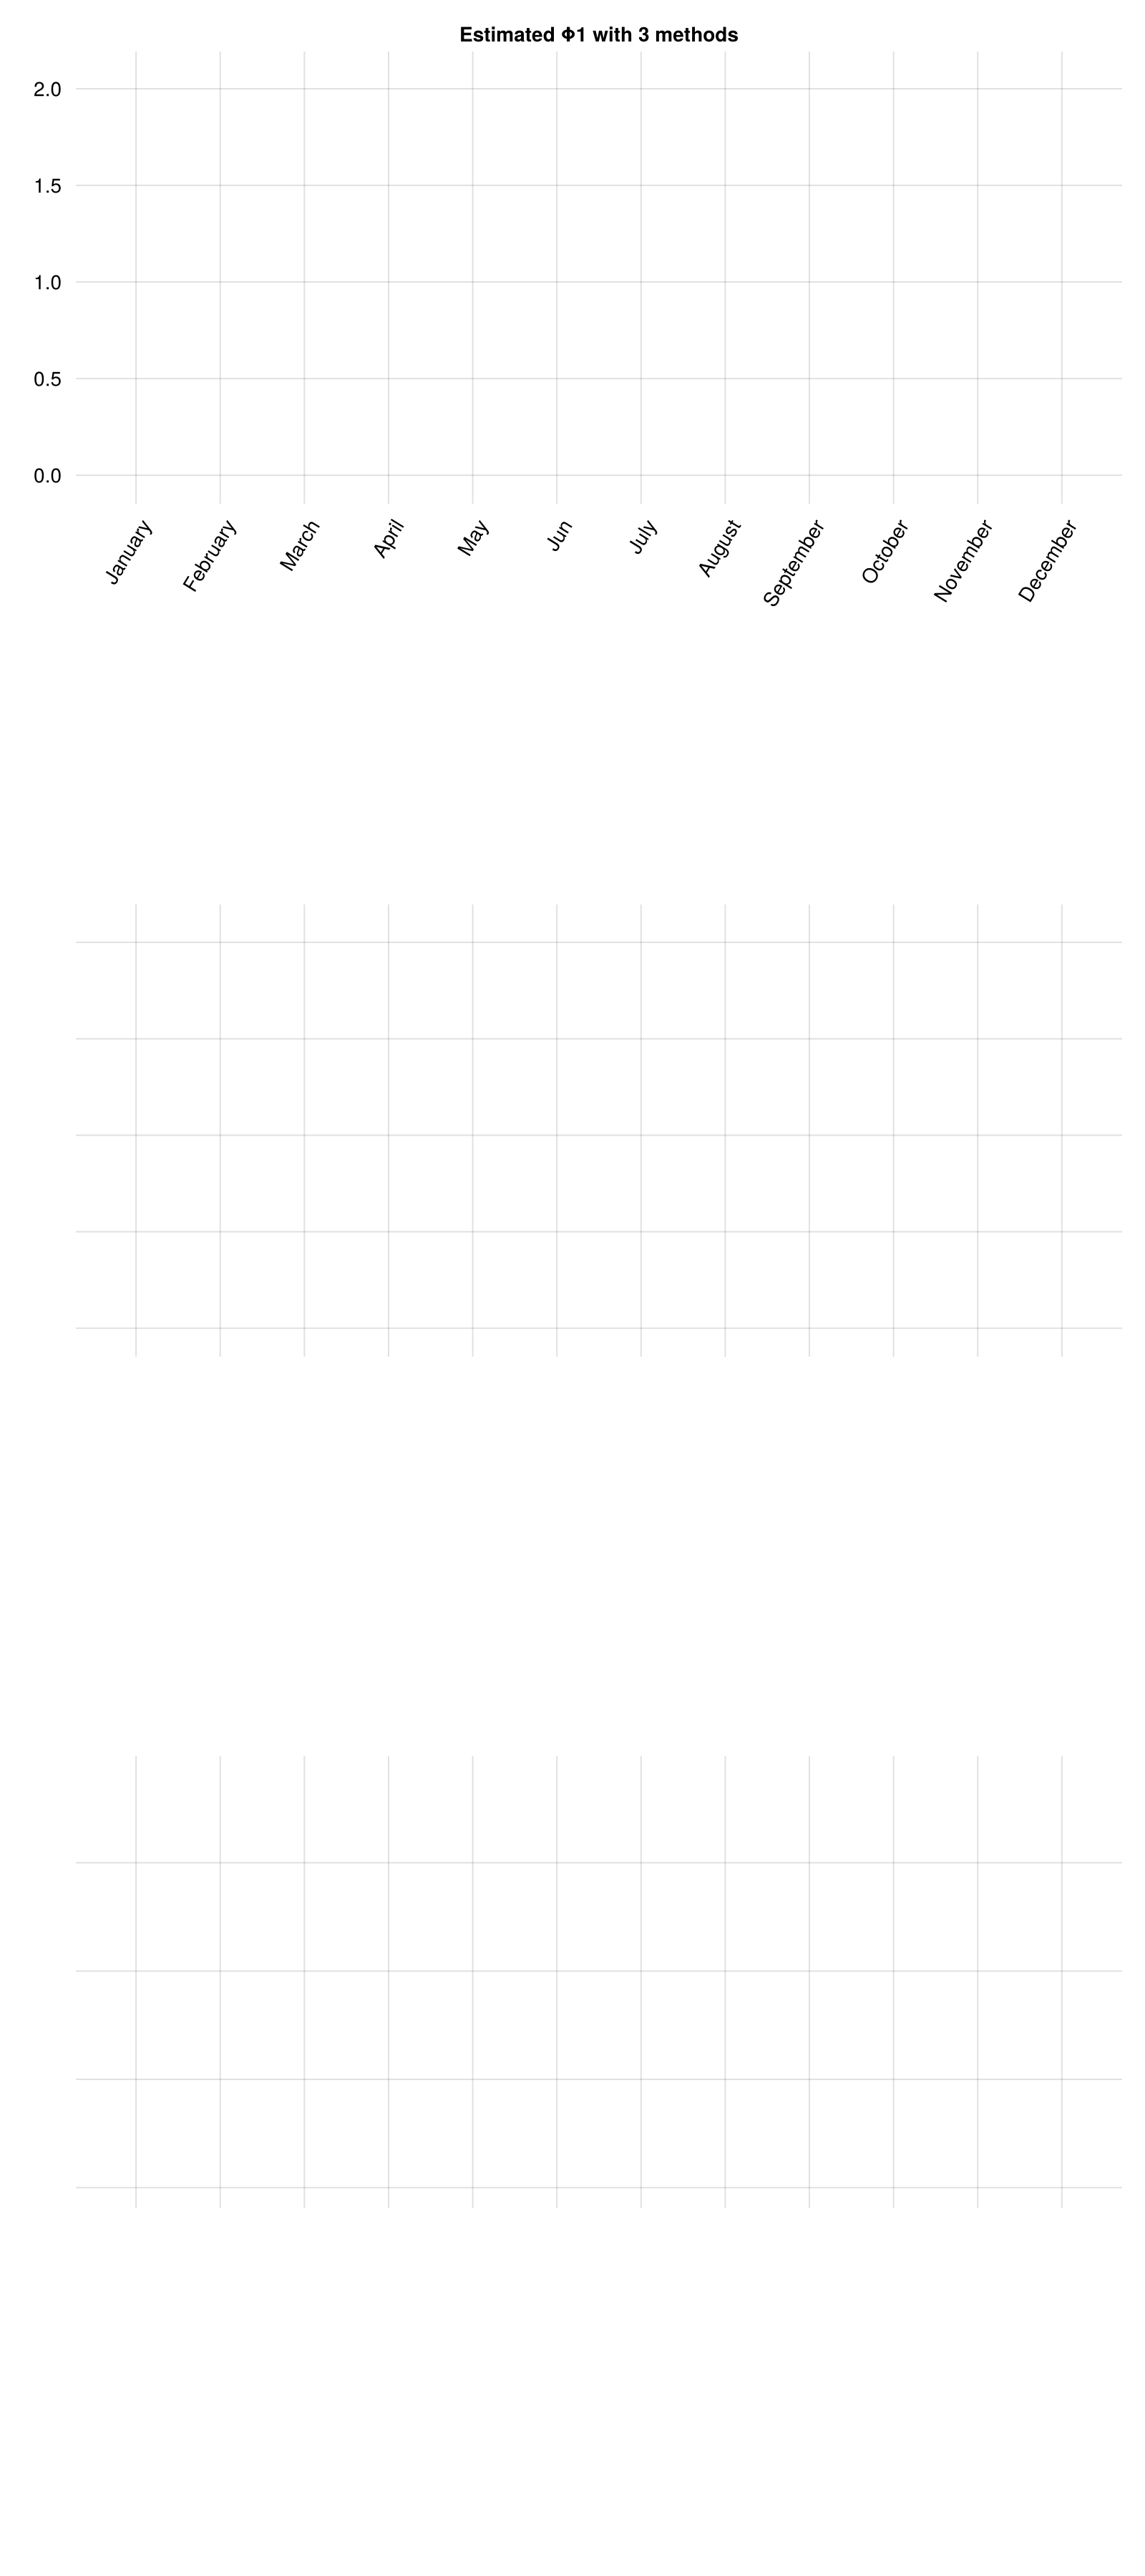

CairoMakie.Screen{IMAGE}


In [10]:
Params, figure= AllEstimation(Monthly_temp, 2, lineplot=true)
display(figure)